In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [7]:
# indicate your path to the data
path = "/Users/bagafoufabrice/Downloads/train.csv"

In [8]:
# Load the data from the text file into a DataFrame
df = pd.read_csv(path, sep = ',')

#print(df)
# Print the DataFrame
df = df.drop(['row_id'],axis = 1)
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5237980 entries, 0 to 5237979
Data columns (total 16 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   stock_id                 int64  
 1   date_id                  int64  
 2   seconds_in_bucket        int64  
 3   imbalance_size           float64
 4   imbalance_buy_sell_flag  int64  
 5   reference_price          float64
 6   matched_size             float64
 7   far_price                float64
 8   near_price               float64
 9   bid_price                float64
 10  bid_size                 float64
 11  ask_price                float64
 12  ask_size                 float64
 13  wap                      float64
 14  target                   float64
 15  time_id                  int64  
dtypes: float64(11), int64(5)
memory usage: 639.4 MB
None


In [9]:
missing_values_count = df.isnull().sum()
print(missing_values_count)
df.head(20)

stock_id                         0
date_id                          0
seconds_in_bucket                0
imbalance_size                 220
imbalance_buy_sell_flag          0
reference_price                220
matched_size                   220
far_price                  2894342
near_price                 2857180
bid_price                      220
bid_size                         0
ask_price                      220
ask_size                         0
wap                            220
target                          88
time_id                          0
dtype: int64


,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.0,-3.029704,0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.0,-5.519986,0
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.0,-8.389950,0
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.0,-4.010200,0
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.0,-7.349849,0
5,5,0,0,0.00,0,1.000635,13552875.92,NaN,NaN,0.999779,1962.72,1.000635,5647.65,1.0,6.779432,0
6,6,0,0,969969.40,1,1.000115,3647503.98,NaN,NaN,0.999506,6663.16,1.000283,3810.48,1.0,-2.499819,0
7,7,0,0,9412959.10,1,0.999818,21261245.87,NaN,NaN,0.999741,5139.20,1.000130,2570.60,1.0,-1.959801,0
8,8,0,0,2394875.85,1,0.999916,9473209.08,NaN,NaN,0.999022,52011.60,1.000041,2169.36,1.0,-5.970001,0
9,9,0,0,3039700.65,-1,1.000969,6248958.45,NaN,NaN,0.999354,6191.00,1.000646,6199.00,1.0,7.970333,0


In [10]:
print('Nombre de jours : ',len(df['date_id'].unique()))
print('nombre de stocks differents : ',len(df['stock_id'].unique()))

Nombre de jours :  481
nombre de stocks differents :  200


In [11]:
def regrouper_par_id_similaire(dataframe,id_):
    grouped = dataframe.groupby(id_)
    groupes = []
    for _, groupe in grouped:
        groupes.append(groupe)
    return groupes

groupes = regrouper_par_id_similaire(df,'stock_id')

## Traitement des valeurs manquantes

### Day 1 ask price plot for stock all stocks

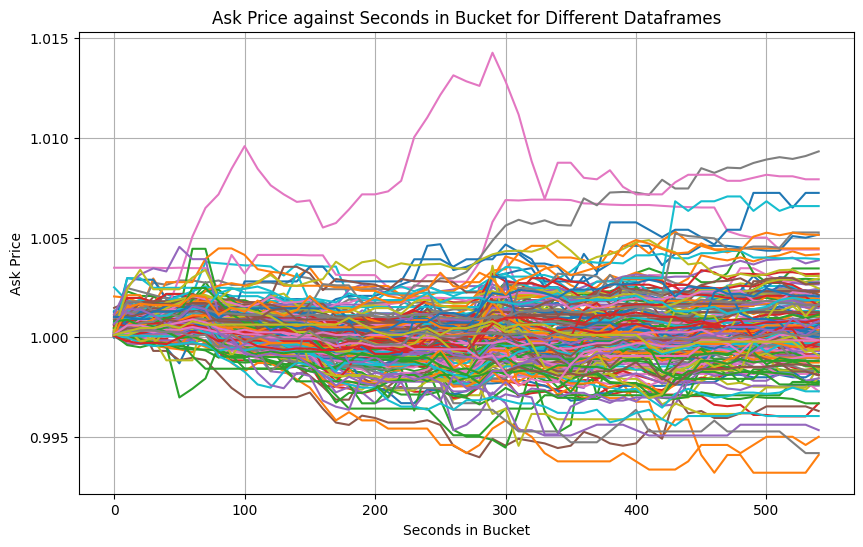

In [12]:
#a = groupes[0][groupes[0]['date_id'] == 0]
#b = groupes[1][groupes[1]['date_id'] == 0]#print(len(a['seconds_in_bucket'])/6)
#a['ask_price'].plot()
#b['ask_price'].plot()
plt.figure(figsize=(10, 6))  # Create a figure to hold the plots

for i in range(len(groupes)):
    a = groupes[i][groupes[i]['date_id'] == 0]
    plt.plot(a['seconds_in_bucket'], a['ask_price'], label=f'Dataframe {i}')  # Plot ask_price against seconds_in_bucket

plt.xlabel('Seconds in Bucket')
plt.ylabel('Ask Price')
plt.title('Ask Price against Seconds in Bucket for Different Dataframes')
#plt.legend()  # Show the legend for different dataframes
plt.grid(True)
plt.show()
    


### Day 1 target stock price plot for stock all stocks

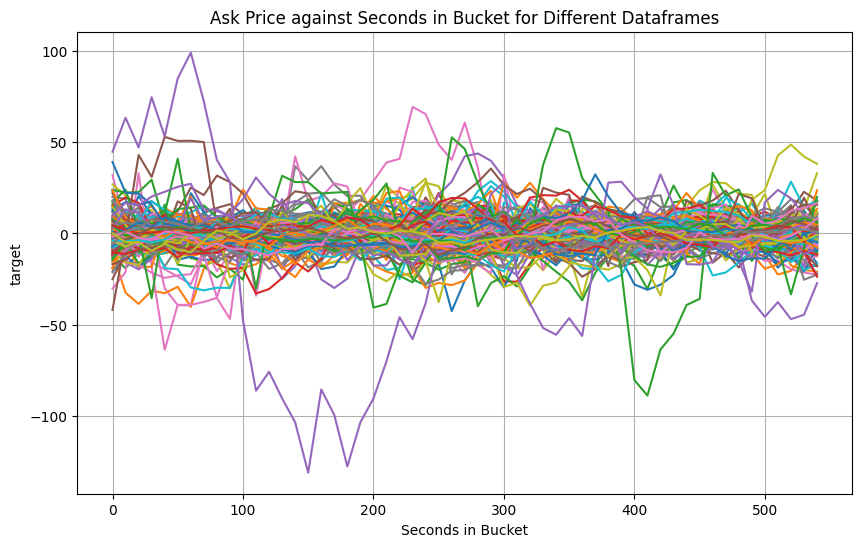

In [13]:

plt.figure(figsize=(10, 6))  # Create a figure to hold the plots

for i in range(len(groupes)):
    a = groupes[i][groupes[i]['date_id'] == 1]
    plt.plot( a['seconds_in_bucket'],a['target'], label=f'Dataframe {i}')  # Plot ask_price against seconds_in_bucket

plt.xlabel('Seconds in Bucket')
plt.ylabel('target')
plt.title('Ask Price against Seconds in Bucket for Different Dataframes')
#plt.legend()  # Show the legend for different dataframes
plt.grid(True)
plt.show()

In [14]:
groupes[0].head()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.000000,-3.029704,0
191,0,0,10,1299772.70,1,1.000026,15261106.63,NaN,NaN,0.999812,13996.50,1.000026,23519.16,0.999892,0.389814,1
382,0,0,20,1299772.70,1,0.999919,15261106.63,NaN,NaN,0.999812,4665.50,0.999919,12131.60,0.999842,4.220009,2
573,0,0,30,1299772.70,1,1.000133,15261106.63,NaN,NaN,1.000026,55998.00,1.000133,46203.30,1.000085,5.450249,3
764,0,0,40,1218204.43,1,1.000455,15342674.90,NaN,NaN,1.000241,14655.95,1.000455,26610.45,1.000317,3.169775,4


A faire :
* Etat de l'art des modèles RNN pour des time series (LSTM,ARIMA etc...)
* definition de l'entrée : vecteur shape [200,17]
* definition de la sortie : vecteur shape [200,1] -> target a chaque instant
* a demander, nombre de paramètre avec la capacité GPU
* enlever des colonnes ?
* preparer la donnée

## Data preparation

In [15]:
groupes_datetime = regrouper_par_id_similaire(df,'date_id')

## Sum target per/day

In [16]:
import plotly.graph_objects as go

target_sum1 = []
target_sum2 = []
for i in range(len(groupes_datetime)):
    target_sum1.append(groupes_datetime[i]['target'].sum())
    target_sum2.append(groupes_datetime[i][groupes_datetime[i]['stock_id'] == 2 ]['target'].sum())

#plt.plot(,target_sum)

fig = go.Figure()

fig.add_trace(
    go.Scatter(x = [i for i in range(len(groupes_datetime))], 
            y = target_sum1, 
            name = 'Target variable 200 stock',
            line = dict(color = 'green'))
) 
fig.add_trace(
    go.Scatter(x = [i for i in range(len(groupes_datetime))], 
            y = target_sum2, 
            name = 'Target variable stock 2',
            line = dict(color = 'blue'))
) 


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'line': {'color': 'green'},
              'name': 'Target variable 200 stock',
              'type': 'scatter',
              'x': [0, 1, 2, ..., 478, 479, 480],
              'y': [-5856.254700849001, -2971.826794573, -1477.17175492, ...,
                    254.3711409790003, -4033.5083497729997, 4069.4397546359996]},
             {'line': {'color': 'blue'},
              'name': 'Target variable stock 2',
              'type': 'scatter',
              'x': [0, 1, 2, ..., 478, 479, 480],
              'y': [8.88884157999999, -38.34962589999999, 98.7952936, ...,
                    97.460746568, 41.73099962000001, -70.20115883999999]}],
    'layout': {'template': '...'}
})

In [17]:
print('jour diff : ',len(groupes_datetime))
for i in range(len(groupes_datetime)):
    #print(groupec)
    if i%100 == 0:
        
        print('daly data shape ',i,' : ',len(groupes_datetime[0]))


jour diff :  481
daly data shape  0  :  10505
daly data shape  100  :  10505
daly data shape  200  :  10505
daly data shape  300  :  10505
daly data shape  400  :  10505


In [18]:
dates_groupes = []
target = []
for i in range(len(groupes_datetime)):
    dates_groupes.append(regrouper_par_id_similaire(groupes_datetime[i],'time_id'))

stock = [i for i in range(200)]

stock_id_manquant =[]

for i in range(len(dates_groupes)):
    for k in range(len(dates_groupes[i])):
        Stock_liste = dates_groupes[i][k]['stock_id'].unique()        
        difference = [item for item in stock if item not in Stock_liste]
        stock_id_manquant.append(difference)

print(difference    )



for i in range(len(dates_groupes)):
    target_inter = []
    for k in range(len(dates_groupes[i])) :
       
        #target extraction
        target_inter.append(dates_groupes[i][k]['target'].values)
        dates_groupes[i][k] = dates_groupes[i][k].drop(['time_id','date_id'],axis = 1)
        dates_groupes[i][k] = dates_groupes[i][k].values
    
    target.append(target_inter)

#dates_groupes = np.array(dates_groupes)


[]


Comptage nombre de stock par jour

In [19]:
#print(groupes_datetime[0]['stock_id'].unique())
#for i in groupes_datetime :
    #print(len(i['stock_id'].unique()))


In [20]:
for i in range(len(dates_groupes)):
    dates_groupes[i] = np.array(dates_groupes[i]).reshape(55, -1).tolist()
    #print(dates_groupes[i].shape)


X_train -> shape(481,55,2800)
* 481 -> number of dates
* 55 -> number on data per day
* 2800 -> number of features per data

target -> shape(481,55,200)

In [21]:
print(len(target))
print(len(target[0]))
print(len(target[0][0]))
for i in range(len(target)):
    for k in range(len(target[i])):
        target[i][k]=target[i][k].tolist()

y_train = target

481
55
191


In [22]:
X_train = dates_groupes
print(len(X_train))
print(len(X_train[0]))
print(len(X_train[0][0]))

481
55
2674


## Model definition

In [23]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
import keras
from keras import layers


/Users/bagafoufabrice/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning:

urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020



In [24]:
model = Sequential()
model.add(tf.keras.layers.LSTM(100, 
               activation='sigmoid',
               return_sequences=True)
       )



In [25]:
def train_loop(dataloader, model, loss_fn, optimizer, shortcut=0):
    size = len(dataloader.dataset)
    model.train()
    num_batches = len(dataloader)

    train_loss = 0
    
    for batch, (X, y) in enumerate(dataloader):
        
        pred = model(X)
        
#print(pred.detach().numpy().flatten())
        
        loss = loss_fn(pred, y)
        train_loss += loss

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        if pred.std() < 0.000001:
            print("WARNING: std() is zero, stopping")
            break
        
        if shortcut > 0 and batch == shortcut:
            return train_loss.detach().cpu().numpy() / shortcut
    return train_loss.detach().cpu().numpy() / num_batches


def test_loop(dataloader, model, loss_fn):
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss = 0
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).detach().cpu().numpy()
    
        scheduler.step(test_loss)
    return test_loss / num_batches
        
def predict(X, model):
    model.eval()
    with torch.no_grad():
        pred = model(X)
    return pred.detach().cpu().numpy().flatten()

In [27]:
def dataloader(batch,X,Y):
    return X[batch],Y[batch]

In [32]:
#for i in range(len(X_train)):
    #X,Y = dataloader(i,X_train,y_train)
    #print(i,len(X),len(Y))

0 55 55
1 55 55
2 55 55
3 55 55
4 55 55
5 55 55
6 55 55
7 55 55
8 55 55
9 55 55
10 55 55
11 55 55
12 55 55
13 55 55
14 55 55
15 55 55
16 55 55
17 55 55
18 55 55
19 55 55
20 55 55
21 55 55
22 55 55
23 55 55
24 55 55
25 55 55
26 55 55
27 55 55
28 55 55
29 55 55
30 55 55
31 55 55
32 55 55
33 55 55
34 55 55
35 55 55
36 55 55
37 55 55
38 55 55
39 55 55
40 55 55
41 55 55
42 55 55
43 55 55
44 55 55
45 55 55
46 55 55
47 55 55
48 55 55
49 55 55
50 55 55
51 55 55
52 55 55
53 55 55
54 55 55
55 55 55
56 55 55
57 55 55
58 55 55
59 55 55
60 55 55
61 55 55
62 55 55
63 55 55
64 55 55
65 55 55
66 55 55
67 55 55
68 55 55
69 55 55
70 55 55
71 55 55
72 55 55
73 55 55
74 55 55
75 55 55
76 55 55
77 55 55
78 55 55
79 55 55
80 55 55
81 55 55
82 55 55
83 55 55
84 55 55
85 55 55
86 55 55
87 55 55
88 55 55
89 55 55
90 55 55
91 55 55
92 55 55
93 55 55
94 55 55
95 55 55
96 55 55
97 55 55
98 55 55
99 55 55
100 55 55
101 55 55
102 55 55
103 55 55
104 55 55
105 55 55
106 55 55
107 55 55
108 55 55
109 55 55
110 55 55
